In [149]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob, os, math
%matplotlib inline

In [170]:
flagstats = [i for i in glob.glob("../../results/mapped/stats/*flagstats.txt")]
nucl_ratio = [i for i in glob.glob("../../results/mapped/stats/*ratio")]
frag_size = [i for i in glob.glob("../../results/metrics/frag_size/counts_*.txt")]
enrichment = [i for i in glob.glob("../../results/tss_enricment/*TssEnrichment")]

# Unique Fragment Count

In [185]:
# to do

# Nucler Read Ratios

In [100]:
nucl_ratio_df = pd.DataFrame(columns = ['bio_sample', 'condition', 'nucl_ratio'])
for file in nucl_ratio:
    with open(file) as f:
        mit, nucl = f.readlines()[0].split('\t')
    nucl_ratio = float(nucl) / (float(mit) + float(nucl))
    bio_sample, condition = os.path.basename(file).split('.')[0].split('_')
    nucl_ratio_df = pd.concat([nucl_ratio_df, pd.DataFrame([bio_sample, condition, nucl_ratio], index = ['bio_sample', 'condition', 'nucl_ratio']).transpose()])

<AxesSubplot:xlabel='condition', ylabel='nucl_ratio'>

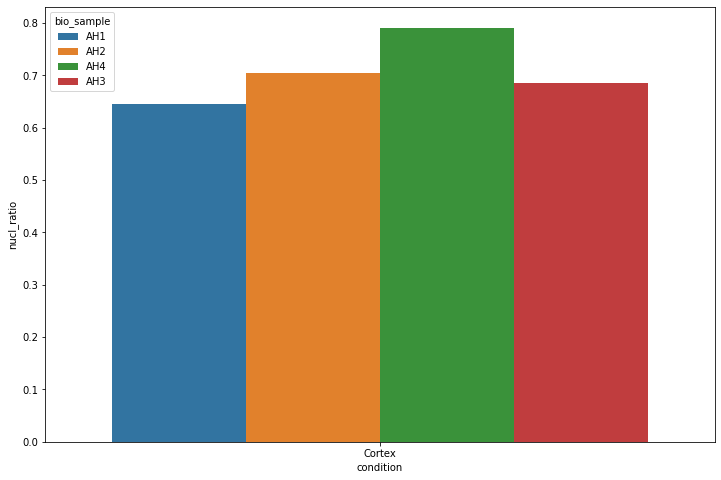

In [184]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = nucl_ratio_df, x = 'condition', y = 'nucl_ratio', hue = 'bio_sample', ax=ax)

# Fragment Size Distribution

> TO-DO: split plots by condition and bio sample.

In [152]:
n = len(frag_size)
ncol = min(4, n)
nrow = math.ceil(n/ncol)

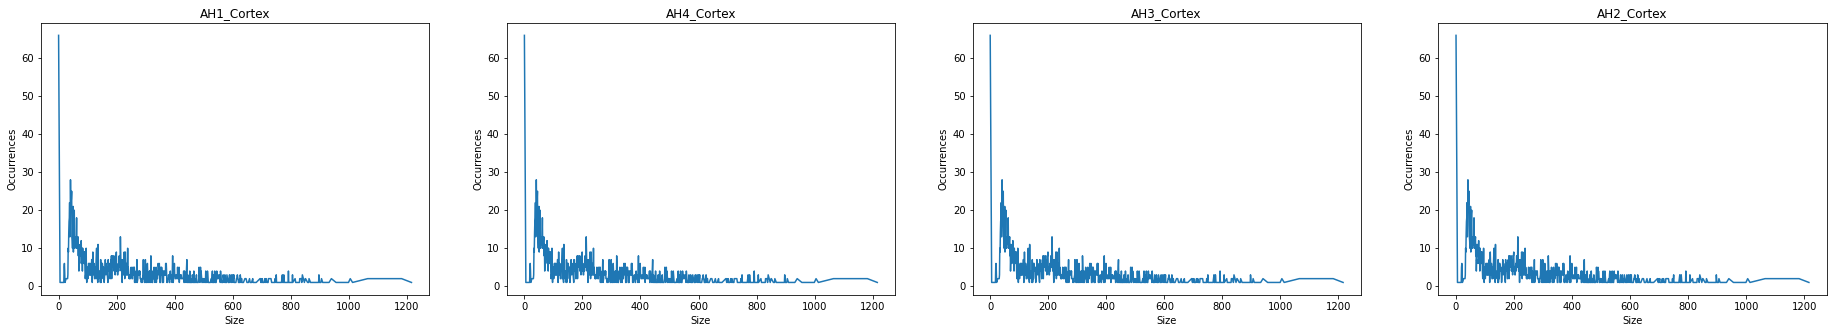

In [165]:
fig, axes = plt.subplots(nrow, ncol, figsize = (8*ncol, 5*nrow))
for file, ax in zip(frag_size, axes.flat):
    frag_size_df = pd.read_csv("../../results/metrics/frag_size/counts_AH1_Cortex.txt", sep = '\t', comment = '#')
    bio_sample, condition = os.path.basename(file).split('.')[0].split('_')[1:3]
    #frag_size_df = frag_size_df.join(pd.DataFrame(frag_size_df.apply(lambda x: os.path.basename(x['Sample']).replace('.bam', '').split('_'), axis = 1).tolist(), columns = ['bio_sample', 'condition'])).drop('Sample', axis = 1)
    sns.lineplot(data = frag_size_df, x = 'Size', y = 'Occurrences', ax = ax)
    ax.set_title(bio_sample + '_' + condition)

# Enrichment Score

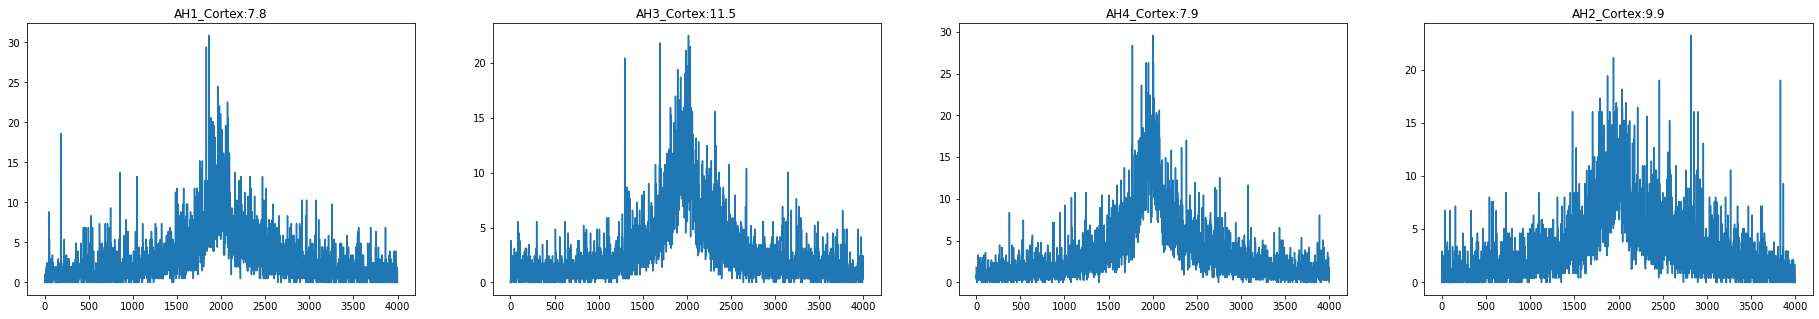

In [181]:
n = len(enrichment)
ncol = min(4, n)
nrow = math.ceil(n/ncol)
fig, axes = plt.subplots(nrow, ncol, figsize = (8*ncol, 5*nrow))
for file, ax in zip(enrichment, axes.flat):
    bio_sample, condition = os.path.basename(file).split('.')[0].split('_')
    with open(file) as f:
        floats = list(map(float, f))
    list_len = 0.05*float(len(floats))
    normTSS = [x / (sum(floats[1:int(list_len)]) /
               len(floats[1:int(list_len)])) for x in floats]
    max_index = normTSS.index(max(normTSS))

    if (((normTSS[max_index]/normTSS[max_index-1]) > 1.5) and
        ((normTSS[max_index]/normTSS[max_index+1]) > 1.5)):
        tmpTSS = list(normTSS)
        del tmpTSS[max_index]
        max_index = tmpTSS.index(max(tmpTSS)) + 1

    Tss_score = round(
        (sum(normTSS[int(max_index-50):int(max_index+50)])) /
        (len(normTSS[int(max_index-50):int(max_index+50)])), 1)
    sns.lineplot(data = normTSS, ax = ax)
    ax.set_title(bio_sample + '_' + condition + ':' + str(Tss_score))
